## Predict the water temperature based on salinity

### Data Preprocessing

In [1]:
# importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning using libraries/')
from ipynb.fs.full.ml_library import *


# importing dataset & storing it as pandas dataframe
bottle_data = pd.read_csv('bottle.csv')
bottle_data.head()

/home/admin1/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
bottle_data = bottle_data[:10000]

In [3]:
bottle_data = bottle_data.loc[:,['T_degC','Salnty']]
bottle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
T_degC    9956 non-null float64
Salnty    9758 non-null float64
dtypes: float64(2)
memory usage: 156.4 KB


#### Checkling for null values

In [4]:
bottle_data.isna().sum()

T_degC     44
Salnty    242
dtype: int64

In [5]:
# filling missing values in columns  with mean of columns respectively
bottle_data['T_degC'].fillna(bottle_data['T_degC'].mean(), inplace= True)
bottle_data['Salnty'].fillna(bottle_data['Salnty'].mean(), inplace= True)

In [6]:
bottle_data.isna().sum()

T_degC    0
Salnty    0
dtype: int64

#### Checking for outliers

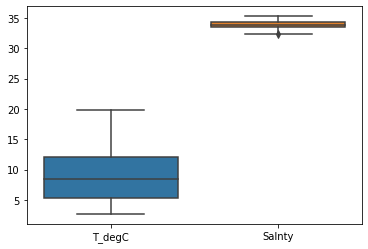

In [7]:
sns.boxplot(data=bottle_data)
plt.show()

In [8]:
bottle_data.shape

(10000, 2)

In [9]:
# removing outliers
bottle_data = remove_outliers(bottle_data,['T_degC','Salnty'])

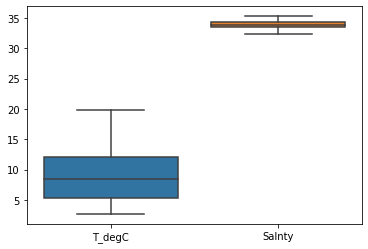

In [10]:
sns.boxplot(data=bottle_data)
plt.show()

In [11]:
bottle_data.shape

(9999, 2)

#### Plotting label data points

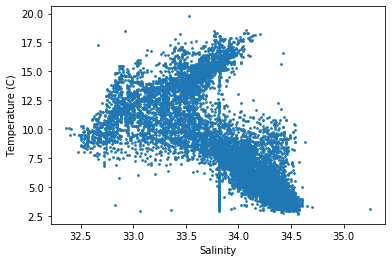

In [12]:
plt.scatter(bottle_data['Salnty'], bottle_data['T_degC'], s=3)
plt.xlabel('Salinity')
plt.ylabel('Temperature (C)')
plt.show()

In [13]:
## As we can see data is not showing neither linear nor curvilinear so linear & polynomial cannot be used 

In [14]:
x_values = bottle_data['Salnty'].values.reshape(-1,1)
y_values = bottle_data['T_degC'].values

In [15]:
x_values.shape, y_values.shape

((9999, 1), (9999,))

#### Splitting dataset into train set & test set

In [34]:
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size = 0.7, random_state=0) 

### Buliding Random Forest Regression model

In [35]:
regressor = RandomForestRegressor(criterion='mae')
regressor.fit(train_x_values, train_y_values)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
test_prediction = regressor.predict(test_x_values)

#### Plotting model against actual data points

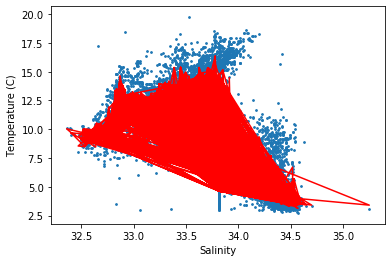

In [37]:
plt.plot(bottle_data['Salnty'], regressor.predict(x_values), c='r')
plt.scatter(bottle_data['Salnty'], bottle_data['T_degC'], s=3)
plt.xlabel('Salinity')
plt.ylabel('Temperature (C)')
plt.show()

### Calculating errors

In [38]:
mean_abs_error = metrics.mean_absolute_error(test_y_values, test_prediction)
mean_abs_error

1.7599613899758937

In [39]:
mean_sqr_error = metrics.mean_squared_error(test_y_values, test_prediction)
mean_sqr_error

6.3825280112217735

In [40]:
root_mean_sqr_error = np.sqrt(mean_sqr_error)
root_mean_sqr_error

2.526366563114263

### Evaluating model against test set

In [41]:
print(f'r2_score: {regressor.score(test_x_values, test_y_values)}')

r2_score: 0.595802121098677


In [42]:
accuracy_test = accuracy_regression(test_prediction, test_y_values)       # accuracy using absolute error
accuracy_test

80.04994661408091